In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/irispdf/iris.csv


In [2]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

In [4]:
# I uploaded the fisheriris and call it here
iris = pd.read_csv('/kaggle/input/irispdf/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# counts the sum of all each different species
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

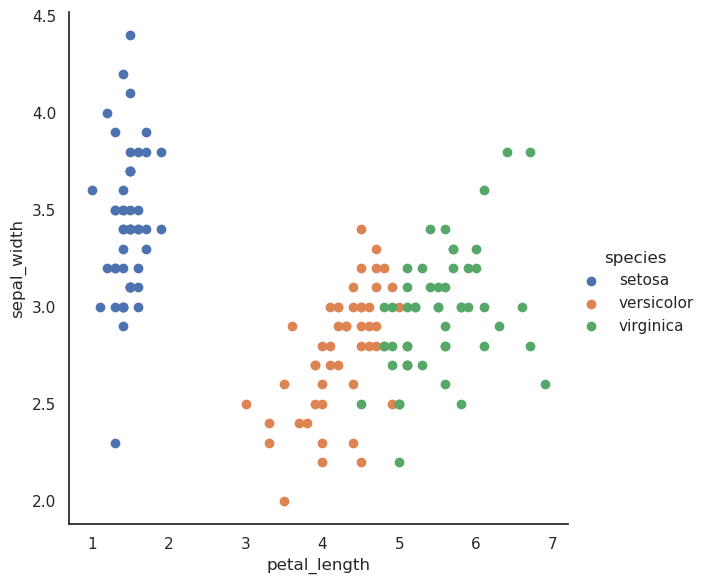

In [6]:
# Scatter plot
# just to see how the data look like... you can change the 2 elements if you want to
sns.FacetGrid(iris, hue="species", height=6).map(plt.scatter, "petal_length", "sepal_width").add_legend()

In [7]:
# Converting categorical variables into numbers
# you can choose any number you like but for me I'll just count the letters of each species
# setosa == 6, versicolor == 10, virginica == 9
# this is only dictionary
flower_mapping = {'setosa': 6, 'versicolor': 10, 'virginica': 9}
iris["species"] = iris['species'].map(flower_mapping)

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,6
1,4.9,3.0,1.4,0.2,6
2,4.7,3.2,1.3,0.2,6
3,4.6,3.1,1.5,0.2,6
4,5.0,3.6,1.4,0.2,6


In [9]:
# Preparing inputs and outputs
# x is our input while y is our output
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
Y = iris[['species']].values

In [10]:
# LOGISTIC REGRESSION (THE ACCURACY) 
# import sa ta sa another required library
from sklearn.linear_model import LogisticRegression

In [11]:
# then katong gi import ato to sya e initialized sa variable nga model
model = LogisticRegression()

In [12]:
# tapos after sa initialization, atu na dayun sya e train ang model
# ang x kay ang input while ang y kay output
model.fit(X, Y)

LogisticRegression()

In [13]:
# mao naning pag test sa atung accuracy
model.score(X, Y)

0.9733333333333334

In [14]:
# Since decimal man iya output ato na dayun sya e convert sa integer para nice tan awon 
# mao na dayun ni answer sa activity
accuracy = int(model.score(X, Y) * 100)

print(accuracy, '%')

97 %


In [15]:
# but out of curiosity pud mag predict ta
# make predictions
# setosa == 6, versicolor == 10, virginica == 9
expected = Y
predicted = model.predict(X)
predicted

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10,  9, 10, 10, 10, 10, 10, 10,  9, 10, 10, 10, 10, 10,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  9,  9,
        9,  9,  9,  9, 10,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9])

In [16]:
# Summarize the fit of the model
# import nasag required nga library

from sklearn import metrics

In [17]:
# pag classify ni sa species, ang 6 which is setosa is 100% precision
# ang 10 which is versicolor is 98% precision
# ang 9 which is virginica is 94% precision
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           6       1.00      1.00      1.00        50
           9       0.94      0.98      0.96        50
          10       0.98      0.94      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



# 50 means 100% since our each species has 50 
# 49 means 98% since 49 raman versicolor ug isa ka virginica which good paman
# while 47 means 94% since 3 kabuok versicolor while 47 ra ang virginica which is wrong

# JAYDE MIKE T. ENGRACIA ----- BSIT 3R5

print(metrics.confusion_matrix(expected, predicted))